In [1]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/MSTF.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-08,24.070000,24.200001,23.740000,23.930000,18.630919,65512400
1,2010-09-09,24.190001,24.209999,23.990000,24.010000,18.693197,46028900
2,2010-09-10,23.980000,24.030001,23.790001,23.850000,18.568626,58284300
3,2010-09-13,24.200001,25.290001,24.090000,25.110001,19.549618,114680400
4,2010-09-14,25.040001,25.350000,24.889999,25.030001,19.487329,87160400
...,...,...,...,...,...,...,...
3016,2022-08-31,265.390015,267.109985,261.329987,261.470001,261.470001,24791800
3017,2022-09-01,258.869995,260.890015,255.410004,260.399994,260.399994,23263400
3018,2022-09-02,261.700012,264.739990,254.470001,256.059998,256.059998,22841600
3019,2022-09-06,256.200012,257.829987,251.940002,253.250000,253.250000,21328200


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-08,24.070000,24.200001,23.740000,23.930000,18.630919,65512400
1,2010-09-09,24.190001,24.209999,23.990000,24.010000,18.693197,46028900
2,2010-09-10,23.980000,24.030001,23.790001,23.850000,18.568626,58284300
3,2010-09-13,24.200001,25.290001,24.090000,25.110001,19.549618,114680400
4,2010-09-14,25.040001,25.350000,24.889999,25.030001,19.487329,87160400


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3016,2022-08-31,265.390015,267.109985,261.329987,261.470001,261.470001,24791800
3017,2022-09-01,258.869995,260.890015,255.410004,260.399994,260.399994,23263400
3018,2022-09-02,261.700012,264.739990,254.470001,256.059998,256.059998,22841600
3019,2022-09-06,256.200012,257.829987,251.940002,253.250000,253.250000,21328200
3020,2022-09-07,254.699997,258.829987,253.220001,258.089996,258.089996,24107300


In [8]:
df1=df.reset_index()['Close']

In [9]:
df1.shape

(3021,)

In [10]:
df1

0        23.930000
1        24.010000
2        23.850000
3        25.110001
4        25.030001
           ...    
3016    261.470001
3017    260.399994
3018    256.059998
3019    253.250000
3020    258.089996
Name: Close, Length: 3021, dtype: float64

In [11]:
import matplotlib.pyplot as plt

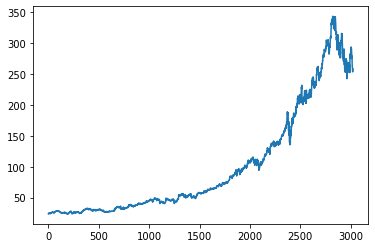

In [12]:
plt.plot(df1)

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[6.88794645e-04]
 [9.39264287e-04]
 [4.38325004e-04]
 ...
 [7.27457762e-01]
 [7.18660022e-01]
 [7.33813423e-01]]


In [18]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(1963, 1058)

In [20]:
test_data

array([[0.23597372],
       [0.23115218],
       [0.23456481],
       ...,
       [0.72745776],
       [0.71866002],
       [0.73381342]])

In [21]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [22]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [23]:
print(X_test)

[[0.23597372 0.23115218 0.23456481 ... 0.2603632  0.26058236 0.25441454]
 [0.23115218 0.23456481 0.23450221 ... 0.26058236 0.25441454 0.26164685]
 [0.23456481 0.23450221 0.23888543 ... 0.25441454 0.26164685 0.26480903]
 ...
 [0.85554168 0.81887922 0.8088604  ... 0.75616789 0.74909209 0.74439578]
 [0.81887922 0.8088604  0.82626803 ... 0.74909209 0.74439578 0.74104573]
 [0.8088604  0.82626803 0.80187852 ... 0.74439578 0.74104573 0.72745776]]


In [24]:
print(y_test)

[0.26164685 0.26480903 0.25331875 0.2442079  0.24859113 0.24846589
 0.25911085 0.26120853 0.2736694  0.27075769 0.27294929 0.27670633
 0.26552912 0.26762682 0.25394491 0.26261741 0.26574828 0.26728243
 0.26844083 0.25773326 0.24790233 0.25128367 0.25040703 0.24358174
 0.23331248 0.2204759  0.2406074  0.24254854 0.24007515 0.24376958
 0.2423607  0.23071386 0.2448967  0.2453037  0.24762056 0.25222292
 0.25012524 0.24762056 0.24527241 0.25453978 0.25569819 0.25801505
 0.26299312 0.25663746 0.25986225 0.2582655  0.26130245 0.25475894
 0.24805888 0.25882906 0.25272387 0.24755793 0.25682531 0.261459
 0.25773326 0.25535379 0.25660614 0.25529119 0.26042581 0.26017534
 0.26045713 0.26458987 0.26443332 0.26123985 0.26831562 0.27319977
 0.27514089 0.27755168 0.2769568  0.27651848 0.27808392 0.27723859
 0.27548529 0.27564184 0.27138386 0.27175957 0.27902319 0.28149658
 0.28425174 0.2845335  0.28866628 0.29386351 0.29411399 0.29370696
 0.30216032 0.29223547 0.2941453  0.29492802 0.2913588  0.291859

In [25]:
print(X_train.shape), print(y_train.shape)

(1862, 100)
(1862,)


(None, None)

In [26]:
print(X_test.shape), print(y_test.shape)

(957, 100)
(957,)


(None, None)

In [27]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 [==============================] - 15s 277ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/100
30/30 [==============================] - 7s 222ms/step - loss: 6.5617e-05 - val_loss: 0.0019
Epoch 3/100
30/30 [==============================] - 7s 226ms/step - loss: 2.9002e-05 - val_loss: 0.0022
Epoch 4/100
30/30 [==============================] - 7s 224ms/step - loss: 2.7484e-05 - val_loss: 0.0020
Epoch 5/100
30/30 [==============================] - 7s 221ms/step - loss: 2.6399e-05 - val_loss: 0.0023
Epoch 6/100
30/30 [==============================] - 7s 221ms/step - loss: 2.6477e-05 - val_loss: 0.0020
Epoch 7/100
30/30 [==============================] - 7s 218ms/step - loss: 2.6849e-05 - val_loss: 0.0023
Epoch 8/100
30/30 [==============================] - 7s 219ms/step - loss: 2.6270e-05 - val_loss: 0.0019
Epoch 9/100
30/30 [==============================] - 7s 221ms/step - loss: 2.6067e-05 - val_loss: 0.0021
Epoch 10/100
30/30 [==============================] - 7s 2

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.9.2'

In [34]:
##do the prediction and check performance petrics
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

30/30 [==============================] - 1s 37ms/step


In [35]:
##dTransformback to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [36]:
##Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

50.20955968291907

In [37]:
##Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

215.84338252242105

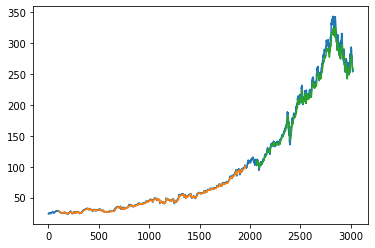

In [38]:
##Ploting
# Shift train prediction for ploting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test prediction for plotiog
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

1058

In [40]:
x_input = test_data[958:].reshape(1,-1)
x_input.shape

(1, 100)

In [41]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.8018785198068231,
 0.8040388267268115,
 0.8190043846777125,
 0.822323098035452,
 0.8049468073552138,
 0.7837195083659145,
 0.8046650384010976,
 0.7717908979495072,
 0.8124922146990953,
 0.8325611072506434,
 0.7946462151692142,
 0.8164058028480942,
 0.8079837548897074,
 0.8336569307175862,
 0.7941140204057492,
 0.7859111552998002,
 0.7541327443890371,
 0.7695366680448132,
 0.7415153393275352,
 0.7252348689833694,
 0.7432999574395724,
 0.7444897038912206,
 0.7611459569694533,
 0.7212586509005044,
 0.7183156232198457,
 0.7164997151878397,
 0.7418284451646783,
 0.7386036516607738,
 0.7476831573812279,
 0.7582655153904734,
 0.7812460924779125,
 0.7769568155209625,
 0.7786788506621912,
 0.7854414495810279,
 0.7711646862752211,
 0.767188515155414,
 0.7789292796024105,
 0.7723857727407666,
 0.7547902960772203,
 0.717846011427189,
 0.6842517394474776,
 0.6912336120139968,
 0.7139950093798689,
 0.6927364173397302,
 0.7011271284150902,
 0.7201941643165883,
 0.7182843332998768,
 0.7362241587574

In [ ]:
#Demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input{}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.70193225]
101
1 day input[0.80403883 0.81900438 0.8223231  0.80494681 0.78371951 0.80466504
 0.7717909  0.81249221 0.83256111 0.79464622 0.8164058  0.80798375
 0.83365693 0.79411402 0.78591116 0.75413274 0.76953667 0.74151534
 0.72523487 0.74329996 0.7444897  0.76114596 0.72125865 0.71831562
 0.71649972 0.74182845 0.73860365 0.74768316 0.75826552 0.78124609
 0.77695682 0.77867885 0.78544145 0.77116469 0.76718852 0.77892928
 0.77238577 0.7547903  0.71784601 0.68425174 0.69123361 0.71399501
 0.69273642 0.70112713 0.72019416 0.71828433 0.73622416 0.76390114
 0.7551034  0.72877277 0.74060746 0.7298685  0.73847839 0.7487164
 0.75923608 0.76609269 0.76377588 0.75391366 0.71997498 0.71700066
 0.72125865 0.72952415 0.72179089 0.73832189 0.74690044 0.7549468
 0.74092046 0.73613024 0.71443333 0.76715718 0.791171   0.80472762
 0.79618041 0.78619292 0.81014406 0.81383847 0.81152165 0.80341271
 0.80961177 0.83108959 0.82438949 0.83969949 0.84458364 0.84220414
 0.83785228 0.8342518  0.82166564 0.

8 day output [[0.63812894]]
9 day input[0.83256111 0.79464622 0.8164058  0.80798375 0.83365693 0.79411402
 0.78591116 0.75413274 0.76953667 0.74151534 0.72523487 0.74329996
 0.7444897  0.76114596 0.72125865 0.71831562 0.71649972 0.74182845
 0.73860365 0.74768316 0.75826552 0.78124609 0.77695682 0.77867885
 0.78544145 0.77116469 0.76718852 0.77892928 0.77238577 0.7547903
 0.71784601 0.68425174 0.69123361 0.71399501 0.69273642 0.70112713
 0.72019416 0.71828433 0.73622416 0.76390114 0.7551034  0.72877277
 0.74060746 0.7298685  0.73847839 0.7487164  0.75923608 0.76609269
 0.76377588 0.75391366 0.71997498 0.71700066 0.72125865 0.72952415
 0.72179089 0.73832189 0.74690044 0.7549468  0.74092046 0.73613024
 0.71443333 0.76715718 0.791171   0.80472762 0.79618041 0.78619292
 0.81014406 0.81383847 0.81152165 0.80341271 0.80961177 0.83108959
 0.82438949 0.83969949 0.84458364 0.84220414 0.83785228 0.8342518
 0.82166564 0.79536635 0.79126492 0.78922987 0.79881033 0.76512213
 0.75616789 0.74909209 0.

16 day output [[0.60202366]]
17 day input[0.76953667 0.74151534 0.72523487 0.74329996 0.7444897  0.76114596
 0.72125865 0.71831562 0.71649972 0.74182845 0.73860365 0.74768316
 0.75826552 0.78124609 0.77695682 0.77867885 0.78544145 0.77116469
 0.76718852 0.77892928 0.77238577 0.7547903  0.71784601 0.68425174
 0.69123361 0.71399501 0.69273642 0.70112713 0.72019416 0.71828433
 0.73622416 0.76390114 0.7551034  0.72877277 0.74060746 0.7298685
 0.73847839 0.7487164  0.75923608 0.76609269 0.76377588 0.75391366
 0.71997498 0.71700066 0.72125865 0.72952415 0.72179089 0.73832189
 0.74690044 0.7549468  0.74092046 0.73613024 0.71443333 0.76715718
 0.791171   0.80472762 0.79618041 0.78619292 0.81014406 0.81383847
 0.81152165 0.80341271 0.80961177 0.83108959 0.82438949 0.83969949
 0.84458364 0.84220414 0.83785228 0.8342518  0.82166564 0.79536635
 0.79126492 0.78922987 0.79881033 0.76512213 0.75616789 0.74909209
 0.74439578 0.74104573 0.72745776 0.71866002 0.73381342 0.70193225
 0.695755   0.68647385

26 day output [[0.5604499]]
27 day input[0.73860365 0.74768316 0.75826552 0.78124609 0.77695682 0.77867885
 0.78544145 0.77116469 0.76718852 0.77892928 0.77238577 0.7547903
 0.71784601 0.68425174 0.69123361 0.71399501 0.69273642 0.70112713
 0.72019416 0.71828433 0.73622416 0.76390114 0.7551034  0.72877277
 0.74060746 0.7298685  0.73847839 0.7487164  0.75923608 0.76609269
 0.76377588 0.75391366 0.71997498 0.71700066 0.72125865 0.72952415
 0.72179089 0.73832189 0.74690044 0.7549468  0.74092046 0.73613024
 0.71443333 0.76715718 0.791171   0.80472762 0.79618041 0.78619292
 0.81014406 0.81383847 0.81152165 0.80341271 0.80961177 0.83108959
 0.82438949 0.83969949 0.84458364 0.84220414 0.83785228 0.8342518
 0.82166564 0.79536635 0.79126492 0.78922987 0.79881033 0.76512213
 0.75616789 0.74909209 0.74439578 0.74104573 0.72745776 0.71866002
 0.73381342 0.70193225 0.695755   0.68647385 0.67656523 0.66714394
 0.65857112 0.65091568 0.644135   0.63812894 0.63276172 0.62788224
 0.62334067 0.61900479 0

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

3021

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

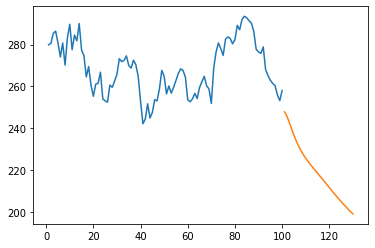

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[2921:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

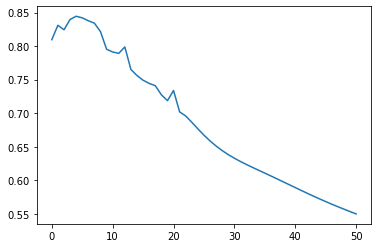

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3000:])

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-08,24.070000,24.200001,23.740000,23.930000,18.630919,65512400
1,2010-09-09,24.190001,24.209999,23.990000,24.010000,18.693197,46028900
2,2010-09-10,23.980000,24.030001,23.790001,23.850000,18.568626,58284300
3,2010-09-13,24.200001,25.290001,24.090000,25.110001,19.549618,114680400
4,2010-09-14,25.040001,25.350000,24.889999,25.030001,19.487329,87160400
...,...,...,...,...,...,...,...
3016,2022-08-31,265.390015,267.109985,261.329987,261.470001,261.470001,24791800
3017,2022-09-01,258.869995,260.890015,255.410004,260.399994,260.399994,23263400
3018,2022-09-02,261.700012,264.739990,254.470001,256.059998,256.059998,22841600
3019,2022-09-06,256.200012,257.829987,251.940002,253.250000,253.250000,21328200


In [ ]:
df1

array([[6.88794645e-04],
       [9.39264287e-04],
       [4.38325004e-04],
       ...,
       [7.27457762e-01],
       [7.18660022e-01],
       [7.33813423e-01]])

In [ ]:
print(lst_output)

[[0.7019322514533997], [0.6957550048828125], [0.6864738464355469], [0.6765652298927307], [0.6671439409255981], [0.6585711240768433], [0.6509156823158264], [0.6441349983215332], [0.638128936290741], [0.6327617168426514], [0.6278822422027588], [0.6233406662940979], [0.6190047860145569], [0.6147669553756714], [0.6105508208274841], [0.6063097715377808], [0.6020236611366272], [0.5976943373680115], [0.5933383703231812], [0.5889816880226135], [0.5846530795097351], [0.5803804397583008], [0.5761869549751282], [0.5720899105072021], [0.5680999159812927], [0.5642204880714417], [0.5604498982429504], [0.5567823648452759], [0.5532090663909912], [0.5497204661369324]]


NameError: name 'lst_output' is not defined